## Implementation of Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height-Weight Graph')

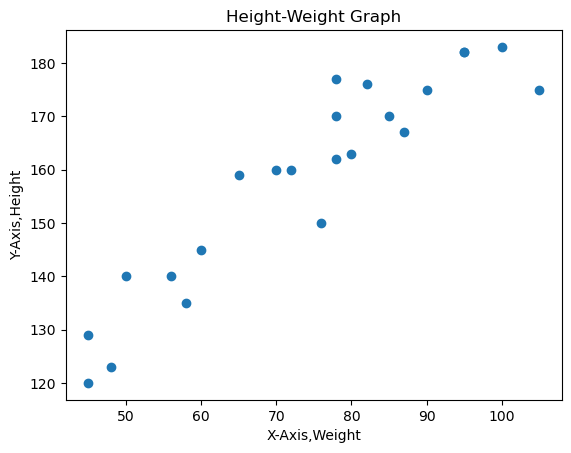

In [5]:
## Scatter Plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('X-Axis,Weight')
plt.ylabel('Y-Axis,Height')
plt.title('Height-Weight Graph')

In [6]:
## Correlation (Finding whether the the realtion is positive or negative)
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


c:\Users\Aftab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Aftab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


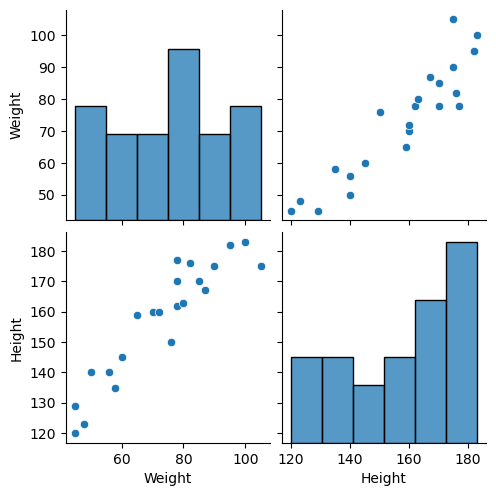

In [7]:
## making pairplot
sns.pairplot(df)

In [8]:
## Independent and dependent features
X=df[['Weight']] ### independent features should be data frame or 2 dimensional array
y=df['Height'] ## this variiable can be in series or 1d array

In [10]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
X


,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [13]:
np.array(y).shape

(23,)

In [14]:
## Train Test Split (for evaluating overfitting and under fitting of model)
from sklearn.model_selection import train_test_split



In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
X_train.shape

(17, 1)

In [17]:
## Standardization
## z_score=(x_i-U)/sigma
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

In [20]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [21]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [22]:
regression=LinearRegression()

In [23]:
regression.fit(X_train,y_train)

LinearRegression()

In [24]:
print(f"coefficient or slope = {regression.coef_}")
print(f"Intercept = {regression.intercept_}")

coefficient or slope = [17.2982057]
Intercept = 156.47058823529412


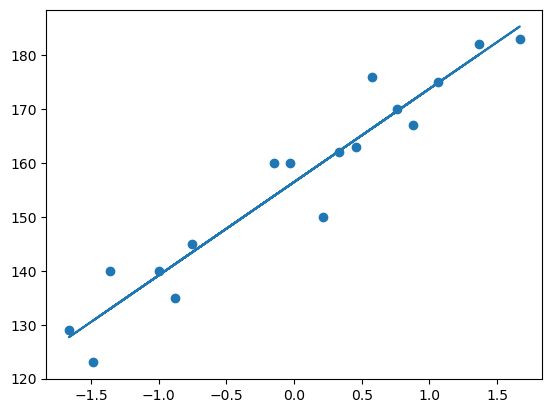

In [27]:
## plot the best fit line wrt to training data
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

## Prediction of test data
### using y=m.x+c for that
#### y_pred_test=156.470+17.29(x_test)

In [28]:
## Prediction of test data
y_predict=regression.predict(X_test)

In [29]:
## performance Matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [30]:
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


## R square and r adjust square
### R^2=1-SSR/SST


In [31]:
from sklearn.metrics import r2_score


In [33]:
score=r2_score(y_test,y_predict)
print(score)

0.7360826717981276


## Adjust R2=1-[(1-R2)(N-1)/(N-p-1)]

In [35]:
## display adjust R-aquared 
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [36]:
## OLS Linear Regression
import statsmodels.api as sm

In [37]:
model=sm.OLS(y_train,X_train).fit()

In [38]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                       0.664
Time:                        20:27:29   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Aftab\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [41]:
## prediction for new data
regression.predict([[72]])

array([1401.94139895])

## the output is quite large this is becoz we donot converted 
### our data into standardization form so we have to transform it

In [42]:
regression.predict(scaler.transform([[72]]))

c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])